# Clustering Global Development

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import silhouette_score

### Importing Dataset

In [139]:
data=pd.read_excel('World_development_mesurement (1).xlsx')
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [140]:
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [141]:
data.tail()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


## EDA (Exploratory Data Analysis)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [144]:
data.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [145]:
data.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [146]:
data.duplicated().sum()

0

### Removing Symbols

In [147]:
data['Business Tax Rate'] = data['Business Tax Rate'].astype(str).str.replace('[%,]', '', regex=True)
data['Business Tax Rate'] = pd.to_numeric(data['Business Tax Rate'], errors='coerce')

data['GDP']=data['GDP'].astype(str).str.replace('[$,]','',regex=True)
data['GDP']=pd.to_numeric(data['GDP'],errors='coerce')

data['Health Exp/Capita']=data['Health Exp/Capita'].astype(str).str.replace('[$,]','',regex =True )
data['Health Exp/Capita']=pd.to_numeric(data['Health Exp/Capita'],errors='coerce')

data['Tourism Inbound']=data['Tourism Inbound'].astype(str).str.replace('[$,]','',regex =True )
data['Tourism Inbound']=pd.to_numeric(data['Tourism Inbound'],errors='coerce')

data['Tourism Outbound']=data['Tourism Outbound'].astype(str).str.replace('[$,]','',regex =True )
data['Tourism Outbound']=pd.to_numeric(data['Tourism Outbound'],errors='coerce')

In [148]:
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4,NaN,United States,5.0,4.0,2132446.0,1.624460e+13,0.179,8895.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.9,NaN,Uruguay,7.0,85.0,NaN,5.000435e+10,0.089,1308.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.9,NaN,"Venezuela, RB",144.0,180.0,NaN,3.812862e+11,0.046,593.0,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


### Data Imputation

In [149]:
data['Birth Rate']=data['Birth Rate'].fillna(data['Birth Rate'].median())
data['Business Tax Rate']=data['Business Tax Rate'].fillna(data['Business Tax Rate'].mean())
data['CO2 Emissions']=data['CO2 Emissions'].fillna(data['CO2 Emissions'].median())
data['Days to Start Business']=data['Days to Start Business'].fillna(data['Days to Start Business'].median())
data['Ease of Business']=data['Ease of Business'].fillna(data['Ease of Business'].mean())
data['Energy Usage']=data['Energy Usage'].fillna(data['Energy Usage'].mean())
data['GDP']=data['GDP'].fillna(data['GDP'].median())
data['Health Exp % GDP']=data['Health Exp % GDP'].fillna(data['Health Exp % GDP'].mean())
data['Health Exp/Capita']=data['Health Exp/Capita'].fillna(data['Health Exp/Capita'].median())
data['Hours to do Tax']=data['Hours to do Tax'].fillna(data['Hours to do Tax'].mean())
data['Infant Mortality Rate']=data['Infant Mortality Rate'].fillna(data['Infant Mortality Rate'].median())
data['Internet Usage']=data['Internet Usage'].fillna(data['Internet Usage'].median())
data['Lending Interest']=data['Lending Interest'].fillna(data['Lending Interest'].median())
data['Life Expectancy Female']=data['Life Expectancy Female'].fillna(data['Life Expectancy Female'].median())
data['Life Expectancy Male']=data['Life Expectancy Male'].fillna(data['Life Expectancy Male'].median())
data['Mobile Phone Usage']=data['Mobile Phone Usage'].fillna(data['Mobile Phone Usage'].median())
data['Population 0-14']=data['Population 0-14'].fillna(data['Population 0-14'].median())
data['Population 15-64']=data['Population 15-64'].fillna(data['Population 15-64'].median())
data['Population 65+']=data['Population 65+'].fillna(data['Population 65+'].median())
data['Population Urban']=data['Population Urban'].fillna(data['Population Urban'].median())
data['Tourism Inbound']=data['Tourism Inbound'].fillna(data['Tourism Inbound'].median())
data['Tourism Outbound']=data['Tourism Outbound'].fillna(data['Tourism Outbound'].median())

In [150]:
data.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

### Visualization

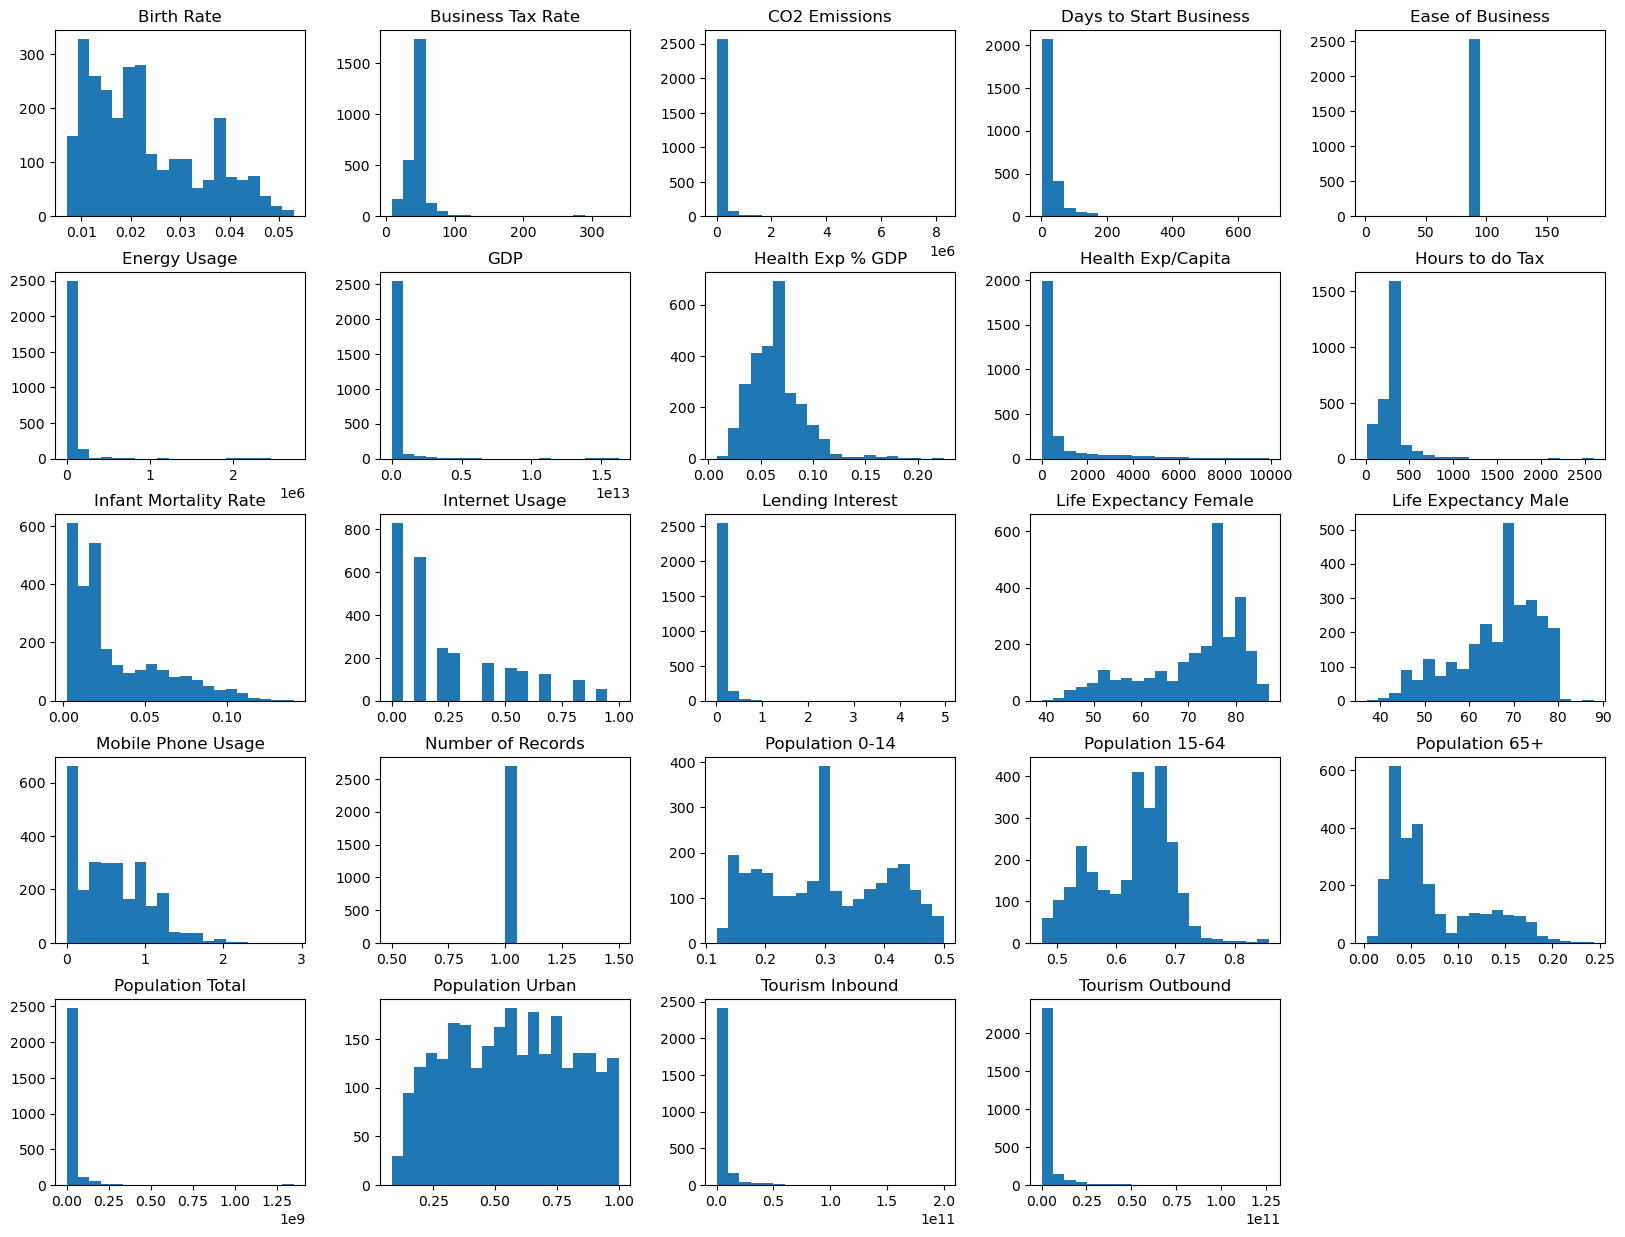

In [151]:
data.hist(bins=20,figsize=(20,15),grid=False)
plt.show()

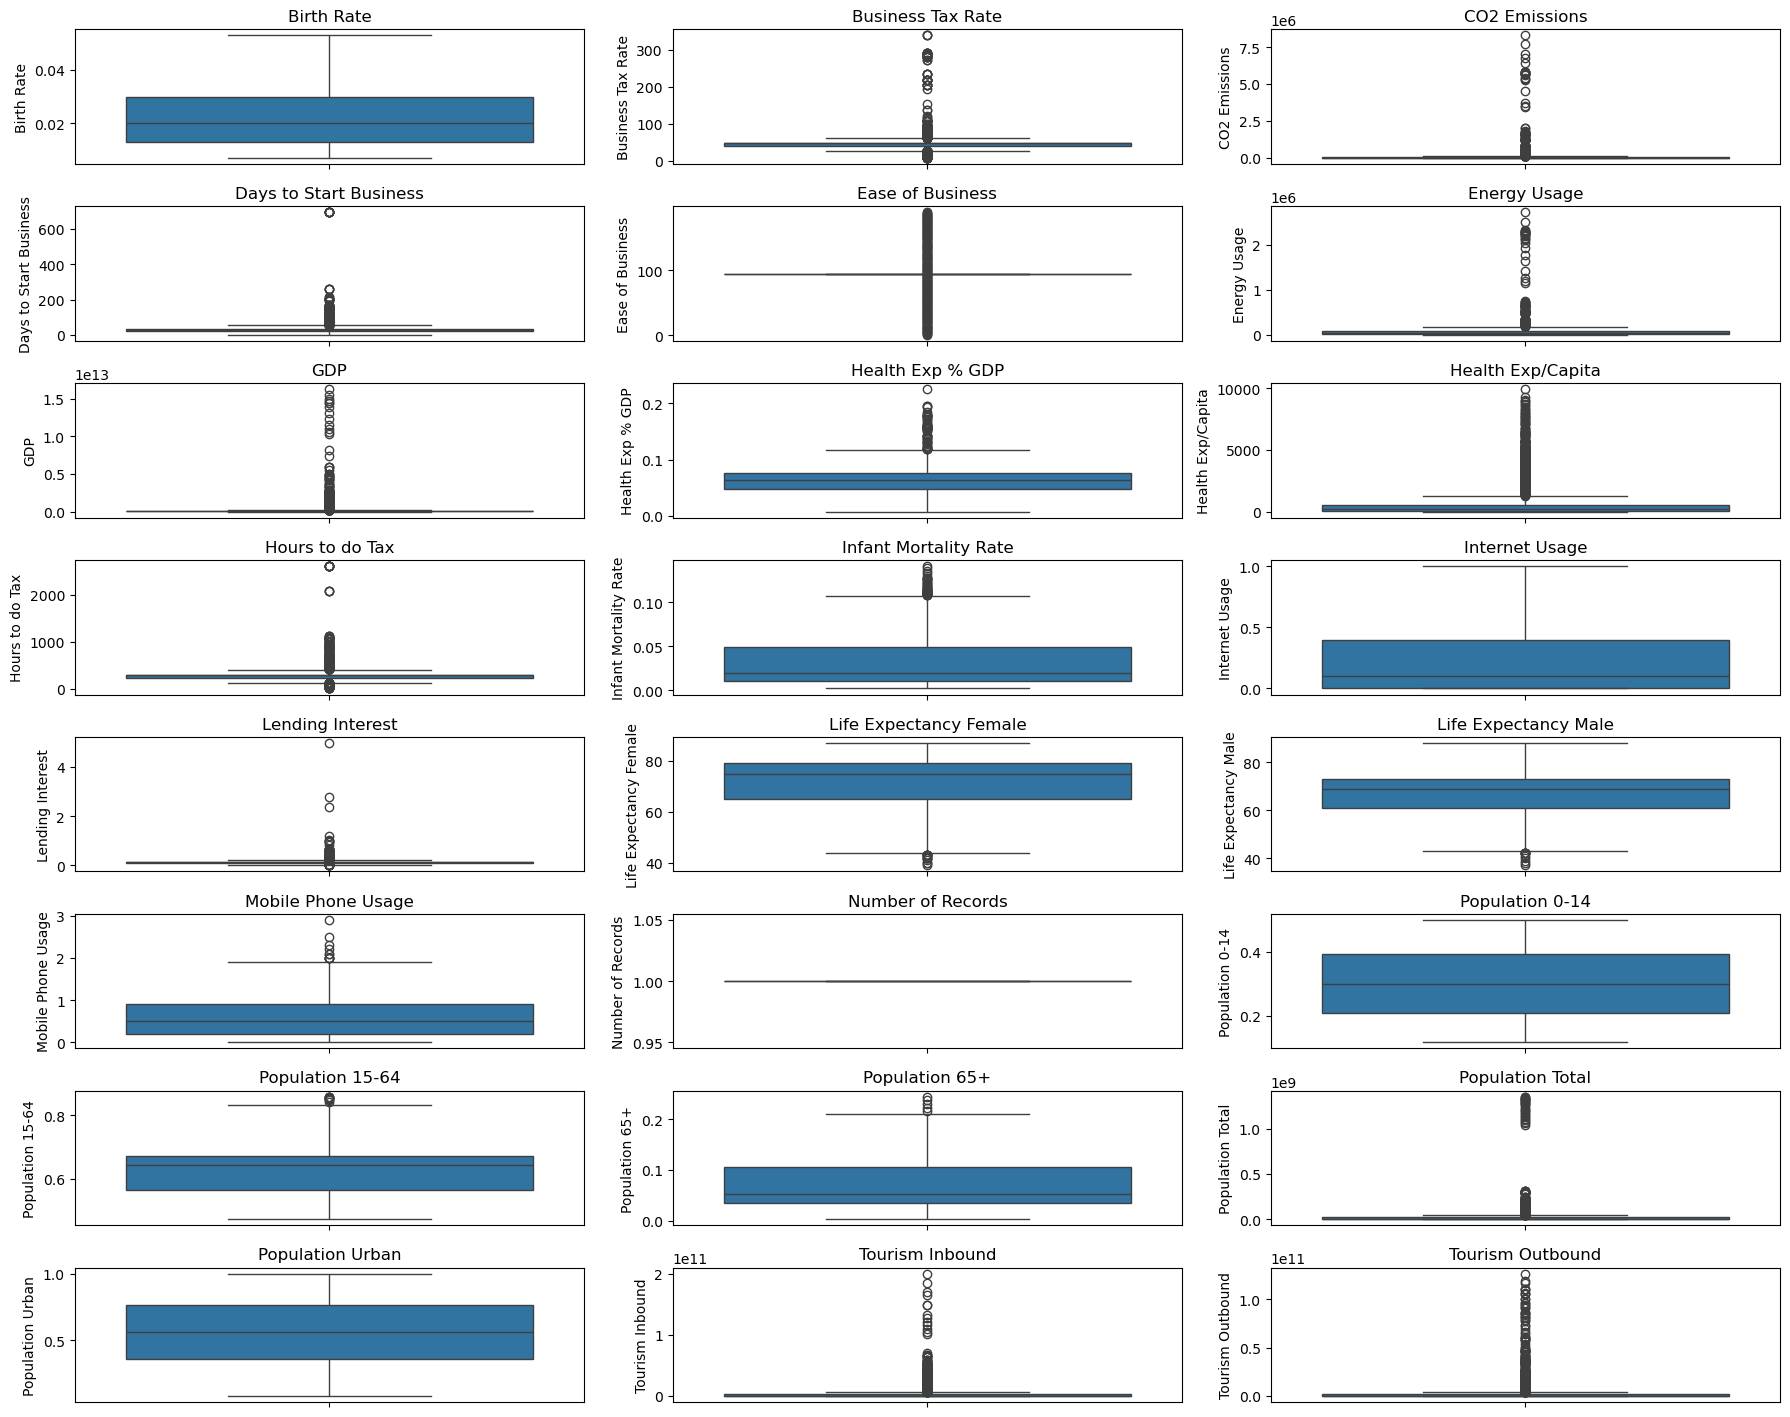

In [152]:
numeric_cols = data.select_dtypes(include=['int','float']).columns
plt.figure(figsize=(18, 16))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # Arrange in grid format
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: >

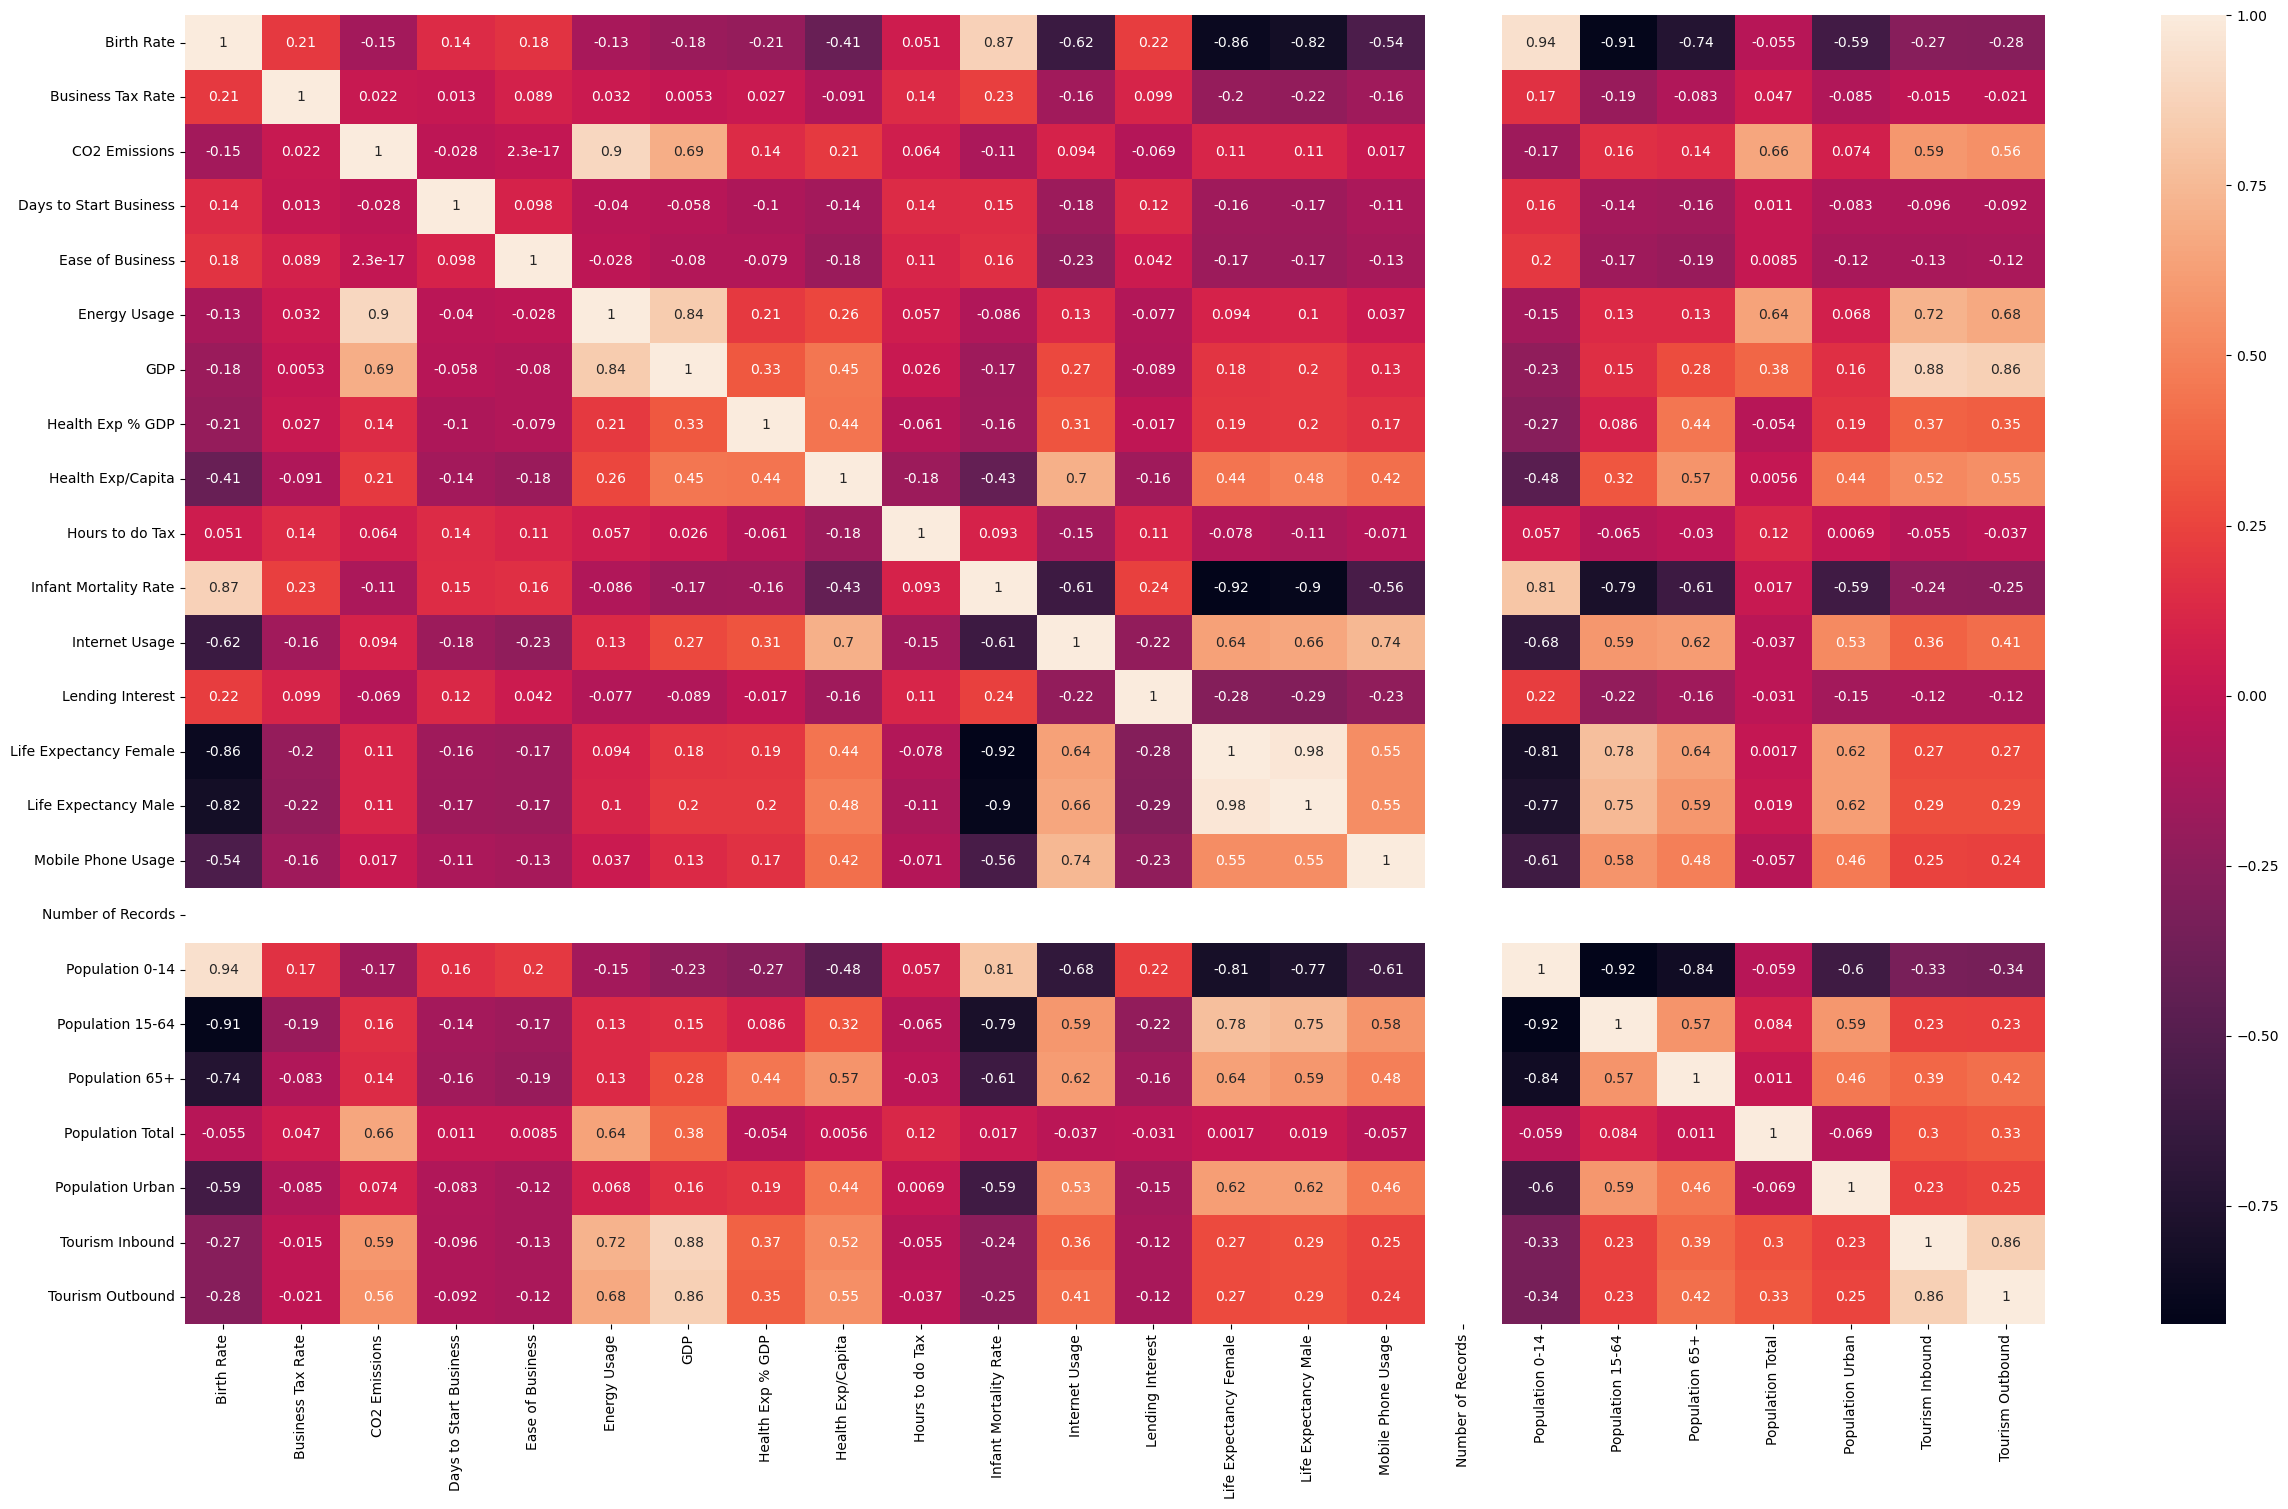

In [153]:
plt.figure(figsize=(30,17))
correlation=data.select_dtypes(include=('int','float64')).corr()
sns.heatmap(correlation,annot=True)

In [154]:
data.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2704.000000,2704.000000,2.704000e+03,2704.000000,2704.000000,2.704000e+03,2.704000e+03,2704.000000,2704.000000,2704.000000,...,2704.000000,2704.000000,2704.0,2704.000000,2704.000000,2704.000000,2.704000e+03,2704.000000,2.704000e+03,2.704000e+03
mean,0.022595,48.966901,1.136616e+05,34.894601,94.875676,7.723684e+04,2.445336e+11,0.064170,731.872411,302.068503,...,66.589497,0.573299,1.0,0.302762,0.625029,0.071718,3.145729e+07,0.562924,4.360806e+09,3.985061e+09
std,0.011100,29.704643,5.487421e+05,46.177780,14.295597,2.111643e+05,1.087172e+12,0.024774,1400.121122,197.739909,...,9.167741,0.460136,0.0,0.102152,0.066967,0.047844,1.242894e+08,0.244712,1.295591e+10,1.216499e+10
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,40.400000,2.237000e+03,20.000000,94.875676,7.851750e+03,4.113748e+09,0.048000,58.000000,229.500000,...,61.000000,0.200000,1.0,0.210000,0.565000,0.034000,8.783360e+05,0.357750,1.860000e+08,1.470000e+08
50%,0.020000,48.966901,8.529000e+03,26.000000,94.875676,4.485050e+04,1.507975e+10,0.064000,193.000000,302.068503,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.030000,48.966901,4.256200e+04,34.250000,94.875676,7.723684e+04,9.101825e+10,0.076000,551.250000,302.068503,...,73.000000,0.900000,1.0,0.395000,0.673000,0.105000,2.014089e+07,0.763000,2.648000e+09,1.711500e+09
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,...,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


In [155]:
data=data.drop(columns=['Ease of Business','Country','Number of Records'])

In [156]:
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,48.966901,87931.0,26.0,2.699800e+04,5.479006e+10,0.03500,60.0,302.068503,0.034,...,71.0,67.0,0.0,0.3420,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,48.966901,9542.0,26.0,7.499000e+03,9.129595e+09,0.03400,22.0,302.068503,0.128,...,47.0,44.0,0.0,0.4760,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,48.966901,1617.0,26.0,1.983000e+03,2.359122e+09,0.04300,15.0,302.068503,0.090,...,57.0,53.0,0.0,0.4540,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,48.966901,4276.0,26.0,1.836000e+03,5.788312e+09,0.04700,152.0,302.068503,0.054,...,52.0,49.0,0.1,0.3830,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,48.966901,1041.0,26.0,7.723684e+04,2.610959e+09,0.05100,12.0,302.068503,0.096,...,52.0,49.0,0.0,0.4680,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,7.723684e+04,1.507975e+10,0.06417,193.0,302.068503,0.020,...,75.0,69.0,0.5,0.2995,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08
2700,0.013,46.400000,8529.0,5.0,2.132446e+06,1.624460e+13,0.17900,8895.0,175.000000,0.006,...,81.0,76.0,1.0,0.1960,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.900000,8529.0,7.0,7.723684e+04,5.000435e+10,0.08900,1308.0,310.000000,0.010,...,80.0,74.0,1.5,0.2200,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.900000,8529.0,144.0,7.723684e+04,3.812862e+11,0.04600,593.0,792.000000,0.013,...,78.0,72.0,1.0,0.2880,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler=StandardScaler()

In [159]:
scaled_data=scaler.fit_transform(data)

In [160]:
scaled_data

array([[-0.23386408,  0.        , -0.04689878, ...,  0.14744887,
        -0.3287761 , -0.31177689],
       [ 2.46933546,  0.        , -0.18977738, ..., -0.97652967,
        -0.33402564, -0.31564115],
       [ 1.8385889 ,  0.        , -0.20422217, ..., -0.73538518,
        -0.33070607, -0.32353411],
       ...,
       [-0.68439734, -0.2379496 , -0.19162376, ...,  1.57387983,
        -0.16511396, -0.24312459],
       [-0.23386408,  0.43547035, -0.19162376, ...,  1.33273534,
        -0.2668624 , -0.06438194],
       [-1.04482395,  0.        , -0.19162376, ...,  1.57796703,
        -0.28349881, -0.29015347]])

# K-Means Clustering

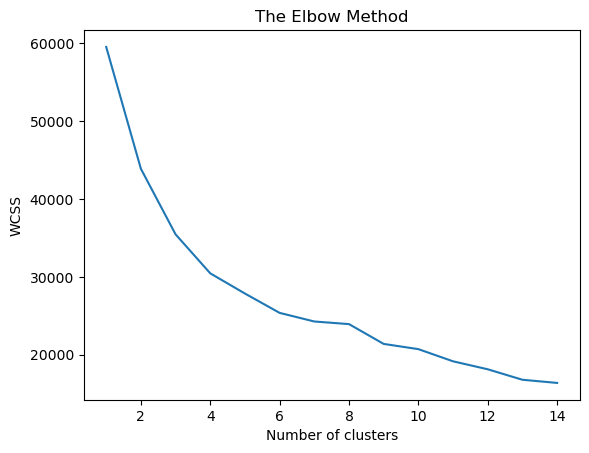

In [162]:
from sklearn.cluster import KMeans
wcss=[]
for i in  range(1,15):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [163]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
km=KMeans(n_clusters=4,random_state=42)
kmeans_clustering=km.fit(scaled_data)
kmeans_clustering

KMeans(n_clusters=4, random_state=42)

In [164]:
data['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)
kmeans_label=kmeans_clustering.labels_
kmeans_labels=pd.Series(kmeans_label, name='KMEANS LABELS')
kmeans_labels

0       0
1       3
2       3
3       3
4       3
       ..
2699    0
2700    2
2701    1
2702    0
2703    0
Name: KMEANS LABELS, Length: 2704, dtype: int32

In [165]:
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Cluster_KMeans
0,0.020,48.966901,87931.0,26.0,2.699800e+04,5.479006e+10,0.03500,60.0,302.068503,0.034,...,67.0,0.0,0.3420,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
1,0.050,48.966901,9542.0,26.0,7.499000e+03,9.129595e+09,0.03400,22.0,302.068503,0.128,...,44.0,0.0,0.4760,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,3
2,0.043,48.966901,1617.0,26.0,1.983000e+03,2.359122e+09,0.04300,15.0,302.068503,0.090,...,53.0,0.0,0.4540,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,3
3,0.027,48.966901,4276.0,26.0,1.836000e+03,5.788312e+09,0.04700,152.0,302.068503,0.054,...,49.0,0.1,0.3830,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,3
4,0.046,48.966901,1041.0,26.0,7.723684e+04,2.610959e+09,0.05100,12.0,302.068503,0.096,...,49.0,0.0,0.4680,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,7.723684e+04,1.507975e+10,0.06417,193.0,302.068503,0.020,...,69.0,0.5,0.2995,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,0
2700,0.013,46.400000,8529.0,5.0,2.132446e+06,1.624460e+13,0.17900,8895.0,175.000000,0.006,...,76.0,1.0,0.1960,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2
2701,0.015,41.900000,8529.0,7.0,7.723684e+04,5.000435e+10,0.08900,1308.0,310.000000,0.010,...,74.0,1.5,0.2200,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,1
2702,0.020,61.900000,8529.0,144.0,7.723684e+04,3.812862e+11,0.04600,593.0,792.000000,0.013,...,72.0,1.0,0.2880,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,0


In [166]:
kmeans_sht=silhouette_score(scaled_data,kmeans_labels)
print(f'Silhouette Score (K-Means): {kmeans_sht}')

Silhouette Score (K-Means): 0.260103480784319


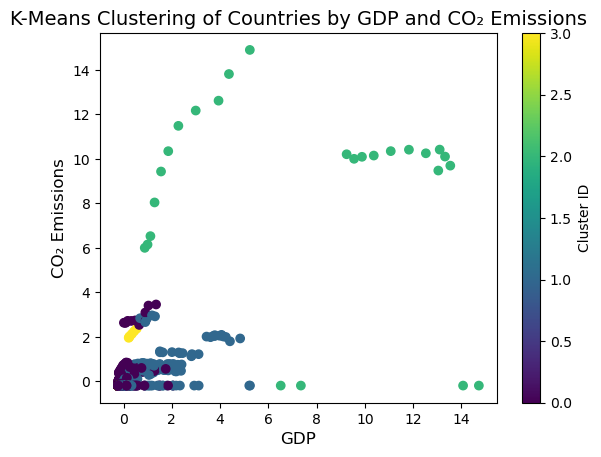

In [167]:
#Visualization for k means clustering
plt.scatter(scaled_data[:, 5], scaled_data[:, 2], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering of Countries by GDP and CO₂ Emissions', fontsize=14)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('CO₂ Emissions', fontsize=12)
plt.colorbar(label='Cluster ID')
plt.show()

# Hierarchical Clustering

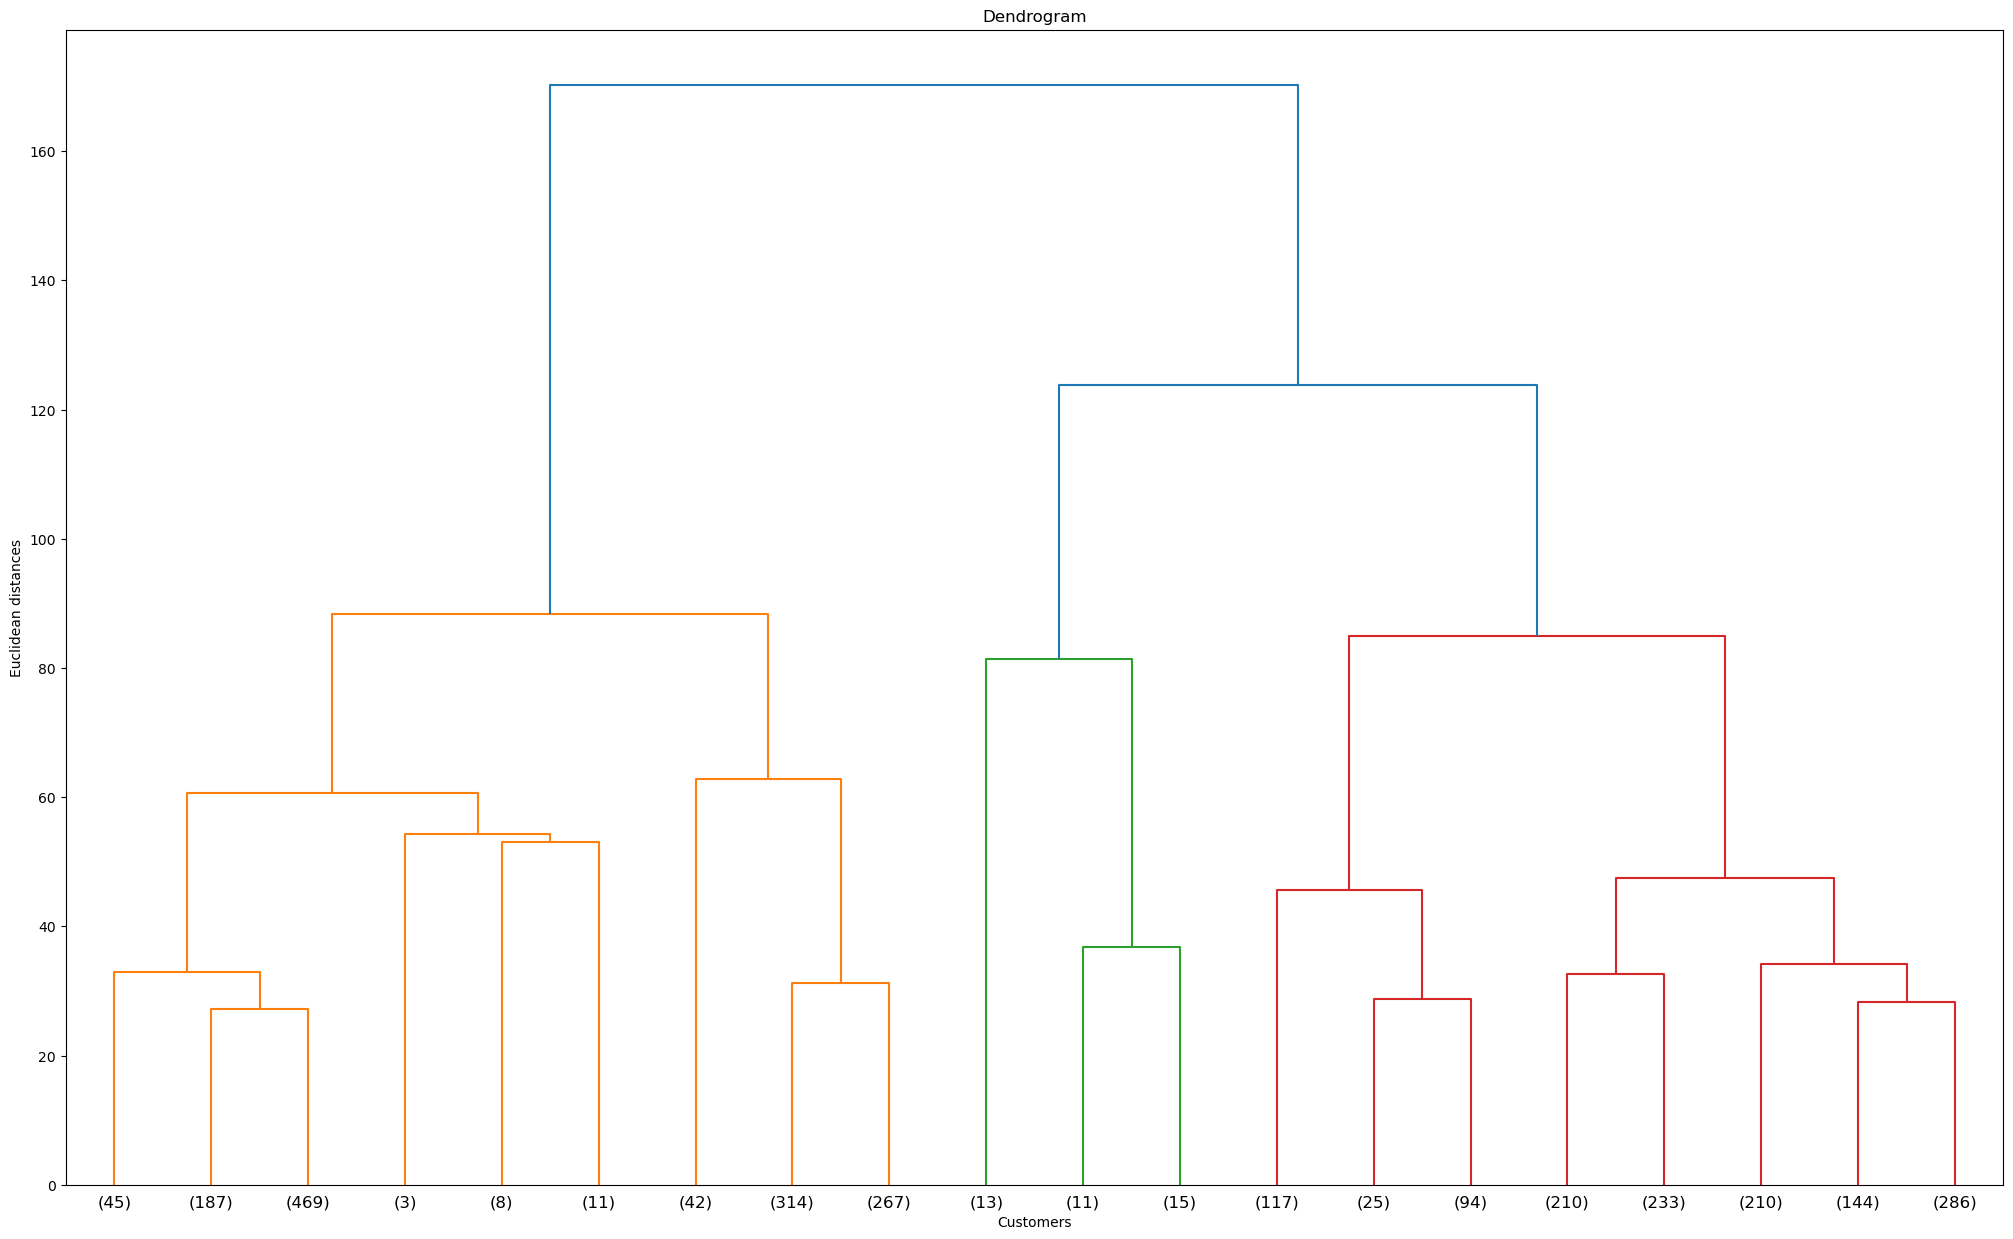

In [169]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'),truncate_mode='lastp',p=20)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [170]:
from sklearn.cluster import AgglomerativeClustering
am_clusters=AgglomerativeClustering(n_clusters=4, metric='euclidean',linkage='complete')
am_labels=am_clusters.fit_predict(scaled_data)
am_labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [171]:
data['Cluster_Hierarchical'] = am_clusters.fit_predict(scaled_data)

In [172]:
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Cluster_KMeans,Cluster_Hierarchical
0,0.020,48.966901,87931.0,26.0,2.699800e+04,5.479006e+10,0.03500,60.0,302.068503,0.034,...,0.0,0.3420,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0,2
1,0.050,48.966901,9542.0,26.0,7.499000e+03,9.129595e+09,0.03400,22.0,302.068503,0.128,...,0.0,0.4760,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,3,2
2,0.043,48.966901,1617.0,26.0,1.983000e+03,2.359122e+09,0.04300,15.0,302.068503,0.090,...,0.0,0.4540,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,3,2
3,0.027,48.966901,4276.0,26.0,1.836000e+03,5.788312e+09,0.04700,152.0,302.068503,0.054,...,0.1,0.3830,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,3,2
4,0.046,48.966901,1041.0,26.0,7.723684e+04,2.610959e+09,0.05100,12.0,302.068503,0.096,...,0.0,0.4680,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,7.723684e+04,1.507975e+10,0.06417,193.0,302.068503,0.020,...,0.5,0.2995,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,0,2
2700,0.013,46.400000,8529.0,5.0,2.132446e+06,1.624460e+13,0.17900,8895.0,175.000000,0.006,...,1.0,0.1960,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2,3
2701,0.015,41.900000,8529.0,7.0,7.723684e+04,5.000435e+10,0.08900,1308.0,310.000000,0.010,...,1.5,0.2200,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,1,2
2702,0.020,61.900000,8529.0,144.0,7.723684e+04,3.812862e+11,0.04600,593.0,792.000000,0.013,...,1.0,0.2880,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,0,2


In [173]:
hc_sht=silhouette_score(scaled_data,am_labels)
print(f'Silhouette Score (Hierarchical Clustering): {hc_sht}')

Silhouette Score (Hierarchical Clustering): 0.6356543099376545


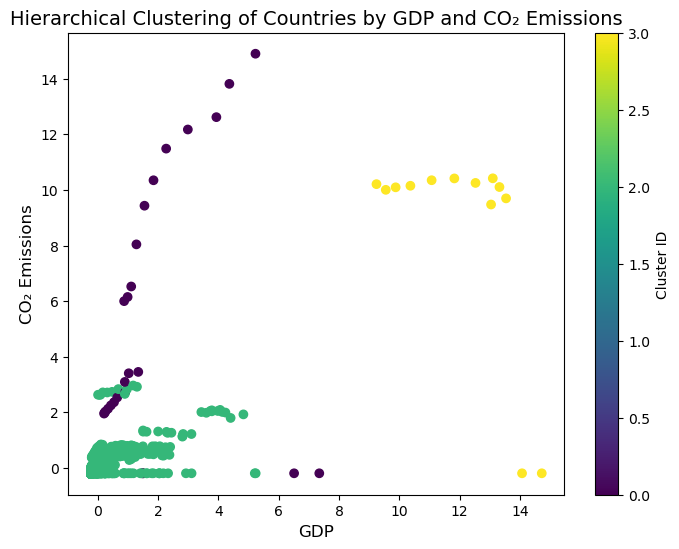

In [174]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 5], scaled_data[:, 2], c=am_labels, cmap='viridis')
plt.title('Hierarchical Clustering of Countries by GDP and CO₂ Emissions', fontsize=14)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('CO₂ Emissions', fontsize=12)
plt.colorbar(label='Cluster ID')
plt.show()

# DBSCAN

In [176]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [177]:
#to find epsilon value
nn=NearestNeighbors(n_neighbors=10)
nn.fit(scaled_data)
distances,idices=nn.kneighbors(scaled_data)
distances=np.sort(distances,axis=0)
distances=distances[:,1]

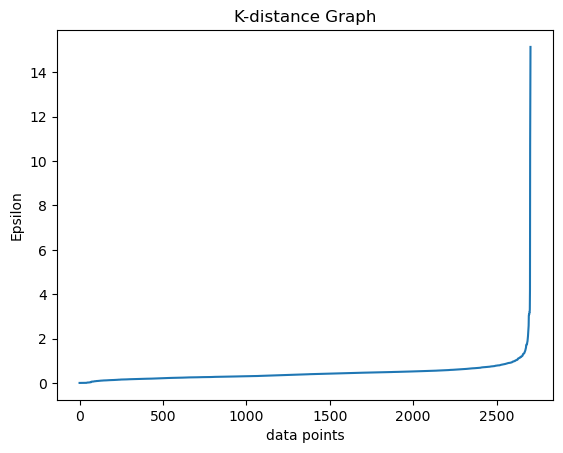

In [178]:
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('data points')
plt.ylabel('Epsilon')
plt.show()

In [179]:
dbscan=DBSCAN(eps=3,min_samples=10)
dbscan_labels=dbscan.fit_predict(scaled_data)
dbscan_labels

array([ 0, -1,  0, ...,  0,  0,  0], dtype=int64)

In [180]:
data['DBSCAN_clusters'] = dbscan.fit_predict(scaled_data)

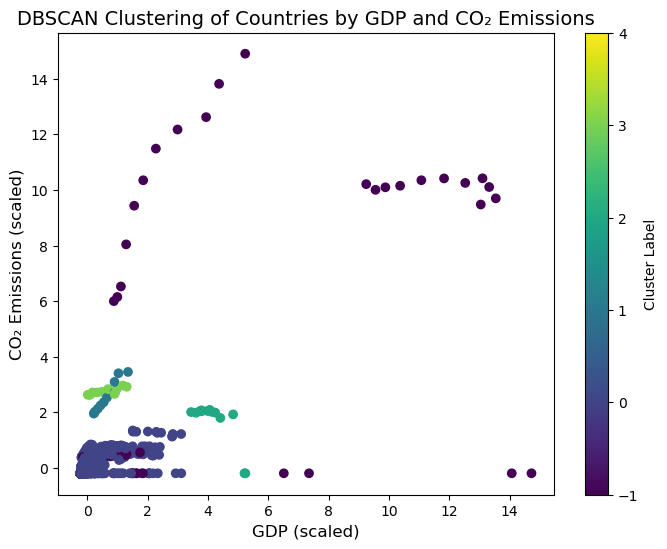

In [181]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 5], scaled_data[:, 2], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering of Countries by GDP and CO₂ Emissions', fontsize=14)
plt.xlabel('GDP (scaled)', fontsize=12)
plt.ylabel('CO₂ Emissions (scaled)', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.show()

In [182]:
dbscan_sht=silhouette_score(scaled_data,dbscan_labels)
print(f'Silhouette Score (DBSCAN): {dbscan_sht}')

Silhouette Score (DBSCAN): 0.2278838288864748


In [183]:
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Cluster_KMeans,Cluster_Hierarchical,DBSCAN_clusters
0,0.020,48.966901,87931.0,26.0,2.699800e+04,5.479006e+10,0.03500,60.0,302.068503,0.034,...,0.3420,0.6190,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0,2,0
1,0.050,48.966901,9542.0,26.0,7.499000e+03,9.129595e+09,0.03400,22.0,302.068503,0.128,...,0.4760,0.4990,0.025,13924930,0.324,3.400000e+07,1.460000e+08,3,2,-1
2,0.043,48.966901,1617.0,26.0,1.983000e+03,2.359122e+09,0.04300,15.0,302.068503,0.090,...,0.4540,0.5170,0.029,6949366,0.383,7.700000e+07,5.000000e+07,3,2,0
3,0.027,48.966901,4276.0,26.0,1.836000e+03,5.788312e+09,0.04700,152.0,302.068503,0.054,...,0.3830,0.5870,0.029,1755375,0.532,2.270000e+08,2.090000e+08,3,2,0
4,0.046,48.966901,1041.0,26.0,7.723684e+04,2.610959e+09,0.05100,12.0,302.068503,0.096,...,0.4680,0.5050,0.028,11607944,0.178,2.300000e+07,3.000000e+07,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,48.966901,8529.0,26.0,7.723684e+04,1.507975e+10,0.06417,193.0,302.068503,0.020,...,0.2995,0.6425,0.052,32427,0.911,6.885000e+08,4.560000e+08,0,2,0
2700,0.013,46.400000,8529.0,5.0,2.132446e+06,1.624460e+13,0.17900,8895.0,175.000000,0.006,...,0.1960,0.6670,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2,3,-1
2701,0.015,41.900000,8529.0,7.0,7.723684e+04,5.000435e+10,0.08900,1308.0,310.000000,0.010,...,0.2200,0.6390,0.140,3395253,0.948,2.222000e+09,1.028000e+09,1,2,0
2702,0.020,61.900000,8529.0,144.0,7.723684e+04,3.812862e+11,0.04600,593.0,792.000000,0.013,...,0.2880,0.6520,0.060,29954782,0.889,9.040000e+08,3.202000e+09,0,2,0


In [255]:
import pickle

In [257]:
pickle.dump(am_clusters,open('HCM.pkl','wb'))